In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn import metrics
import time

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA
from sklearn import metrics

sns.set(style="whitegrid", color_codes=True)

In [5]:
boston = pd.read_csv('C://Users//fergu//boston_results_2014.csv')

In [6]:
boston.head(10)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
5,32.58,"Sumgong, Jemima Jelagat",4,82.45,F,29,140.68,F3,4,NaN,...,28,5.37,NaN,99.33,16.22,69.47,65.83,KEN,Nandi,132.95
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
7,30.48,"Geneti, Markos",5,76.95,M,29,129.83,5,5,NaN,...,5,4.97,NaN,92.52,15.17,64.85,61.62,ETH,Addis Ababa,122.80
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,NaN,...,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83


In [7]:
boston.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [8]:
len(boston)

31984

## The Aim: To Use Clustering Techniques On This Dataset

#### Isolate the Numerical Fields

In [9]:
boston_num = boston.select_dtypes(include=['int64', 'float64'])

In [10]:
boston_num.head()

,division,age,official,genderdiv,overall,pace
0,8,47,85.25,8,8,3.27
1,1,33,138.95,1,21,5.30
2,1,41,80.60,1,1,3.08
3,3,24,140.58,3,27,5.37
4,2,40,81.23,2,2,3.10


#### Normalize the Data

In [11]:
boston_norm = pd.DataFrame(normalize(boston_num))
boston_norm.columns = boston_num.columns
boston_norm.head()

,division,age,official,genderdiv,overall,pace
0,0.081315,0.477724,0.866510,0.081315,0.081315,0.033237
1,0.006923,0.228445,0.961893,0.006923,0.145374,0.036690
2,0.011050,0.453050,0.890630,0.011050,0.011050,0.034034
3,0.020646,0.165166,0.967459,0.020646,0.185812,0.036956
4,0.022060,0.441190,0.895948,0.022060,0.022060,0.034192


### Summary of Results
When no ground truth is assumed, the best results are achieved using a k-means model, with 10 clusters. This gives a mean silhouette score of 0.563 across all folds.
With a ground truth (the split between male and female runners), we see that the data do not split well along gender lines. With all models used, the aggregate confusion matrix scores are little better than random chance. The Adjusted Rand Index scores are also barely better than chance.
### No Ground Truth 
Silhouette Score: <BR/>
K-Means: Optimal No. of Clusters: 10. Mean silhouette score: 0.563 <BR/>
Mean Shift: Optimal quant value: 0.900. Corresponding no. of clusters: 1. Mean Silhouette Score: 0.736<BR/>
Spectral Clustering - Optimal no. of clusters: 4. Mean Silhouette Score: 0.498<BR/>
Affinity Propagation: Number of clusters: 1092. Mean silhouette score: 0.118 <BR/>          

### Ground Truth - Male / Female <BR/>
Here we attempt to cluster the data along gender lines. <BR/>
K-Means on entire dataset: Contingency Aggregate Score (Confusion Matrix): 0.7675 <BR/>
K-Means using 4 folds: Contingency Aggregate Scores (Confusion Matrix): <BR/>
.4451, 0.5649, 0.5482, 0.5482<BR/>
Adjusted Rand Index: <BR/>
0.0075, 0.0119, -0.0007, 0.0005<BR/>
<BR/>
Mean Shift: Quant value chosen to yield 2 clusters: Contingency Aggregate Scores (Confusion Matrix): <BR/>
0.4590, 0.4656, 0.4551, 0.4435 <BR/>
Adjusted Rand Index: <BR/>
-0.0021, -0.0017, -0.0018, -0.0032<BR/>
<BR/>
Spectral Clustering - 2 clusters specified: <BR/>
Contingency Aggregate Scores (Confusion Matrix): <BR/>
0.5559, 0.5664, 0.4376, 0.5550 <BR/>
Adjusted Rand Index: <BR/>
0.0064, 0.0123, 0.0087, 0.0050<BR/>



## Test for Consistency across folds

Since we have no 'Ground Truth' i.e. no known clustering arrangement that we can compare our chosen clusters against, we will use the Silhouette Coefficient.

In [15]:
# Create a copy of the dataframe to leave the original df untouched:
boston_norm_sampling = boston_norm.copy()

#### Compute the Silhouette Coefficient - K-Means

In [16]:
def kmeans_eval(df, no_of_folds, clusters):
    # Make copy of original table and work on that- this leaves 
    # the original dataframe unaltered so that the function
    # can be run multiple times without giving an error msg
    df_for_use = df.copy()
    # Create dictionary to hold the divided data    
    samples_dict = {}
    for i in range(0, no_of_folds):
        sample_portion = df_for_use.sample(frac=1/no_of_folds)
        # Add the chosen rows to the dictionary
        samples_dict[i] = sample_portion
        # Remove the chosen rows from consideration for future samples
        df_for_use.drop(sample_portion.index, inplace=True)
    
    # Create and populate another dictionary holding the clustering results
    pred_dict = {}
    # Create list to hold the silhouette scores for however many folds there are
    sil_list = []
    for key in samples_dict:
        cluster_pred = KMeans(n_clusters=clusters, random_state=42).fit(samples_dict[key])
        # The 'labels' are the clusters to which each datapoint belongs
        pred_dict[key] = cluster_pred.labels_
        # Compute the silhouette coefficient       
        sil = metrics.silhouette_score(samples_dict[key], pred_dict[key], metric='euclidean')
        sil_list.append(sil)
    return (np.mean(sil_list), np.std(sil_list))    

Optimal number of clusters: 10
Mean Silhouette Score for this no. of clusters: 0.5634853758605142

Time taken to compute: 90.675 seconds 



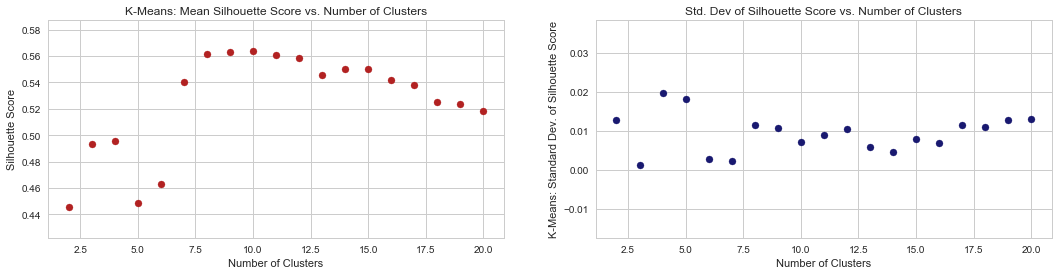

In [17]:
mean_vals = []
std_vals = []
clust_lim = 21
start_time = time.time()
for i in range(2, clust_lim):
    result = kmeans_eval(boston_norm_sampling, 5, i)
    mean_vals.append(result[0])
    std_vals.append(result[1])
max_sil_score = max(mean_vals)
max_sil_std = max(std_vals)
print('Optimal number of clusters: {}'.format(mean_vals.index(max_sil_score) + 2))
print('Mean Silhouette Score for this no. of clusters: {}'.format(max_sil_score))
print('\nTime taken to compute:', '%.3f' % (time.time() - start_time), 'seconds \n')

plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.scatter(np.arange(2, clust_lim), mean_vals, color='firebrick')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
#plt.xticks(np.arange(0, clust_lim))
plt.title('K-Means: Mean Silhouette Score vs. Number of Clusters')
plt.subplot(1,2,2)
plt.scatter(np.arange(2, clust_lim), std_vals, color='midnightblue')
plt.xlabel('Number of Clusters')
plt.ylabel('K-Means: Standard Dev. of Silhouette Score')
#plt.xticks(np.arange(2, clust_lim))
plt.title('Std. Dev of Silhouette Score vs. Number of Clusters')
plt.show()

#### Compute the Silhouette Coefficient - Mean Shift

In [18]:
def meanshift_eval(df, no_of_folds, quantile):
    global cluster_centers
    # Make copy of original table and work on that- this leaves 
    # the original dataframe unaltered so that the function
    # can be run multiple times without giving an error msg
    df_for_use = df.copy()
    # Create dictionary to hold the divided data    
    samples_dict = {}
  
    from sklearn.cluster import MeanShift, estimate_bandwidth
    for i in range(0, no_of_folds):
        sample_portion = df_for_use.sample(frac=1/no_of_folds)
        # Add the chosen rows to the dictionary
        samples_dict[i] = sample_portion
        # Remove the chosen rows from consideration for future samples
        df_for_use.drop(sample_portion.index, inplace=True)
                 
    # Create and populate another dictionary holding the clustering results
    pred_dict = {}
    # Create list to hold the silhouette scores for however many folds there are
    sil_list = []
    for key in samples_dict:
        # Set the bandwidth. This function automatically derives a bandwidth
        # number based on an inspection of the distances among points in the data.
        bandwidth = estimate_bandwidth(samples_dict[key], quantile=quantile, n_samples=500)       
        # Declare and fit the model
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        ms.fit(samples_dict[key])        
        # The 'labels' are the clusters to which each datapoint belongs
        pred_dict[key] = ms.labels_ 
        # The locations of the cluster centers
        cluster_centers = ms.cluster_centers_
        # Compute the silhouette coefficient
        if len(cluster_centers) > 1:
            sil = metrics.silhouette_score(samples_dict[key], pred_dict[key], metric='euclidean')
            sil_list.append(sil)
        else:
            break
    return (np.mean(sil_list), np.std(sil_list), len(cluster_centers))    

Optimal quant value: 0.9000000000000002
Corresponding no. of clusters: 1
Mean Silhouette Score for this no. of clusters: 0.7361009803371735

Time taken to compute: 77.901 seconds 



C:\Users\fergu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\fergu\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\fergu\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\fergu\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\fergu\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Quantile,No. of clusters,Mean silh score,SD of silh scores
0,0.10,20,0.472709,0.037177
1,0.15,9,0.391304,0.061606
2,0.20,7,0.471344,0.031879
3,0.25,6,0.475834,0.054468
4,0.30,9,0.484360,0.028352
5,0.35,7,0.487157,0.052049
6,0.40,6,0.494577,0.039756
7,0.45,5,0.489165,0.029935
8,0.50,3,0.494822,0.043166
9,0.55,6,0.572395,0.110230



 -------------------------------------------------------------------------------- 



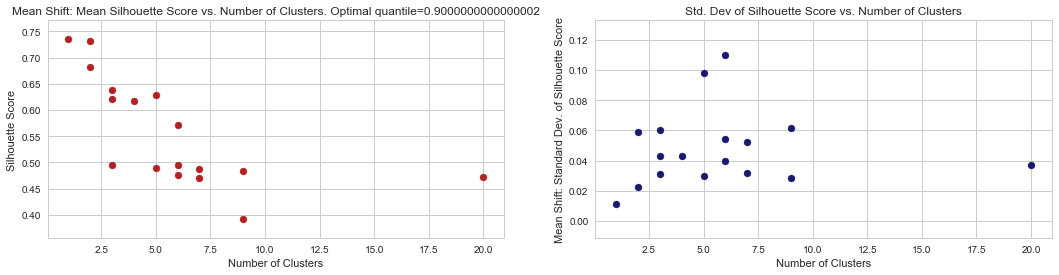

In [19]:
mean_vals = []
std_vals = []

quantile_start = 0.1
quantile_end = 1.0
quantile_range = np.arange(quantile_start, quantile_end, 0.05)
no_of_clusters = []

start_time = time.time()
for quant in quantile_range:
    result = meanshift_eval(boston_norm_sampling, 5, quant)
    mean_vals.append(result[0])
    std_vals.append(result[1])
    no_of_clusters.append(result[2])
max_sil_score = max(mean_vals)
max_sil_std = max(std_vals)

print('Optimal quant value: {}'.format(quantile_range[mean_vals.index(max_sil_score)]))
print('Corresponding no. of clusters: {}'.format(no_of_clusters[mean_vals.index(max_sil_score)]))      
print('Mean Silhouette Score for this no. of clusters: {}'.format(max_sil_score))
print('\nTime taken to compute:', '%.3f' % (time.time() - start_time), 'seconds \n')

table = {'Quantile': quantile_range, 'No. of clusters': no_of_clusters,
        'Mean silh score': mean_vals, 'SD of silh scores': std_vals}

table_final = pd.DataFrame()
for key in table:
      table_final[key] = table[key]

display(table_final)
print('\n', '-' * 80, '\n')

plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.scatter(no_of_clusters, mean_vals, color='firebrick')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
#plt.xticks(np.arange(0, clust_lim))
plt.title('Mean Shift: Mean Silhouette Score vs. Number of Clusters. Optimal quantile={}'
          .format(quantile_range[mean_vals.index(max_sil_score)]))
plt.subplot(1,2,2)
plt.scatter(no_of_clusters, std_vals, color='midnightblue')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Shift: Standard Dev. of Silhouette Score')
#plt.xticks(np.arange(2, clust_lim))
plt.title('Std. Dev of Silhouette Score vs. Number of Clusters')
plt.show()

#### Compute the Silhouette Coefficient - Spectral Clustering

In [20]:
def spect_eval(df, no_of_folds, clusters):
    # Make copy of original table and work on that- this leaves 
    # the original dataframe unaltered so that the function
    # can be run multiple times without giving an error msg
    df_for_use = df.copy()
    # Create dictionary to hold the divided data    
    samples_dict = {}

    for i in range(0, no_of_folds):
        sample_portion = df_for_use.sample(frac=1/no_of_folds)
        # Add the chosen rows to the dictionary
        samples_dict[i] = sample_portion
        # Remove the chosen rows from consideration for future samples
        df_for_use.drop(sample_portion.index, inplace=True)
                 
    # Create and populate another dictionary holding the clustering results
    pred_dict = {}
    # Create list to hold the silhouette scores for however many folds there are
    sil_list = []
    for key in samples_dict:
        # Get no. of clusters from input value
        n_clusters=clusters       
        # Declare and fit the model. Predict the clusters and insert into the dataframe:
        sc = SpectralClustering(n_clusters=clusters, n_jobs=-1)
        pred_dict[key] =sc.fit_predict(samples_dict[key])       
        sil = metrics.silhouette_score(samples_dict[key], pred_dict[key], metric='euclidean')
        sil_list.append(sil)
    return (np.mean(sil_list), np.std(sil_list))    

Optimal no. of clusters: 4
Mean Silhouette Score for this no. of clusters: 0.4976948408185569

Time taken to compute: 228.765 seconds 



,No. of clusters,Mean silh score,SD of silh scores
0,2,0.433940,0.004039
1,3,0.491925,0.001329
2,4,0.497695,0.009674
3,5,0.447611,0.002662
4,6,0.423671,0.005065
5,7,0.453224,0.023105
6,8,0.451707,0.035326
7,9,0.422165,0.020169
8,10,0.484267,0.016561



 -------------------------------------------------------------------------------- 



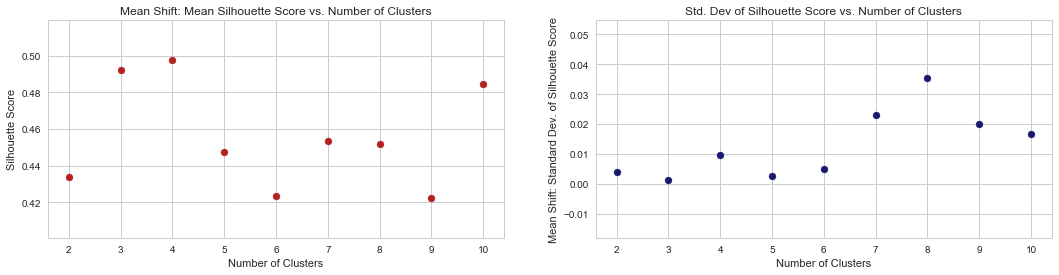

In [21]:
mean_vals = []
std_vals = []

min_clusters = 2
max_clusters = 10
cluster_range = np.arange(min_clusters, max_clusters + 1)

start_time = time.time()
for clusters in cluster_range:
    result = spect_eval(boston_norm_sampling, 5, clusters)
    mean_vals.append(result[0])
    std_vals.append(result[1])

max_sil_score = max(mean_vals)
max_sil_std = max(std_vals)

print('Optimal no. of clusters: {}'.format(cluster_range[mean_vals.index(max_sil_score)]))      
print('Mean Silhouette Score for this no. of clusters: {}'.format(max_sil_score))
print('\nTime taken to compute:', '%.3f' % (time.time() - start_time), 'seconds \n')

table = {'No. of clusters': cluster_range,
        'Mean silh score': mean_vals, 'SD of silh scores': std_vals}

table_final = pd.DataFrame()
for key in table:
      table_final[key] = table[key]

display(table_final)
print('\n', '-' * 80, '\n')

plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.scatter(cluster_range, mean_vals, color='firebrick')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Mean Shift: Mean Silhouette Score vs. Number of Clusters')
plt.subplot(1,2,2)
plt.scatter(cluster_range, std_vals, color='midnightblue')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Shift: Standard Dev. of Silhouette Score')
plt.title('Std. Dev of Silhouette Score vs. Number of Clusters')
plt.show()

#### Compute the Silhouette Coefficient - Affinity Propagation

In [22]:
def affin_eval(df, no_of_folds):
    # Make copy of original table and work on that- this leaves 
    # the original dataframe unaltered so that the function
    # can be run multiple times without giving an error msg
    df_for_use = df.copy()
    # Create dictionary to hold the divided data    
    samples_dict = {}
    
    start_time = time.time()
    for i in range(0, no_of_folds):
        sample_portion = df_for_use.sample(frac=1/no_of_folds)
        # Add the chosen rows to the dictionary
        samples_dict[i] = sample_portion
        # Remove the chosen rows from consideration for future samples
        df_for_use.drop(sample_portion.index, inplace=True)
                 
    # Create and populate another dictionary holding the clustering results
    pred_dict = {}
    # Create list to hold the silhouette scores for however many folds there are
    sil_list = []
    for key in samples_dict:
        af = AffinityPropagation().fit(samples_dict[key])
        # Define the cluster centers:
        cluster_centers_indices = af.cluster_centers_indices_
        # No. of clusters:
        n_clusters_ = len(cluster_centers_indices)
        # Cluster assignments for each data point:
        labels = af.labels_
        pred_dict[key] = labels
      
        sil = metrics.silhouette_score(samples_dict[key], pred_dict[key], metric='euclidean')
        sil_list.append(sil)
    print('Number of clusters: {}'.format(n_clusters_))    
    print('Mean silhouette score: {}'.format(np.mean(sil_list)))
    print('SD of silhouette scores: {}'.format(np.std(sil_list)))
    t = time.time() - start_time
    print('Time taken: {} minutes'.format('%1.f' % (t / 60)))

In [13]:
affin_eval(boston_norm_sampling, 4)

Number of clusters: 1092
Mean silhouette score: 0.11811293040334814
SD of silhouette scores: 0.06783454006117529
Time taken: 73 minutes


### Create a Ground Truth
The ground truth we will try will be sex. We now engineer a variable, 

In [12]:
boston_norm2 = boston_norm.copy()

In [13]:
boston_norm2['sex'] = [1 if boston['gender'][i] == 'M' else 0 for i in range(0, len(boston['gender']))]

In [14]:
boston_norm2.head()

,division,age,official,genderdiv,overall,pace,sex
0,0.081315,0.477724,0.866510,0.081315,0.081315,0.033237,1
1,0.006923,0.228445,0.961893,0.006923,0.145374,0.036690,0
2,0.011050,0.453050,0.890630,0.011050,0.011050,0.034034,1
3,0.020646,0.165166,0.967459,0.020646,0.185812,0.036956,0
4,0.022060,0.441190,0.895948,0.022060,0.022060,0.034192,1


### Re-run Selected Models to Try to Compare vs. Known Clusters

#### k-Means

In [26]:
cluster_pred = KMeans(n_clusters=2, random_state=42).fit(boston_norm2.drop('sex', axis=1))
# The 'labels' are the clusters to which each datapoint belongs
y_pred = cluster_pred.labels_

In [27]:
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [28]:
# Perform a PCA on the dataframe for illustrative purposes:
pca = PCA(n_components=2)

In [29]:
# Remove the two columns that have or could have to do with gender:
boston_pca = pca.fit_transform(boston_norm2.drop(['sex', 'genderdiv'], axis=1))

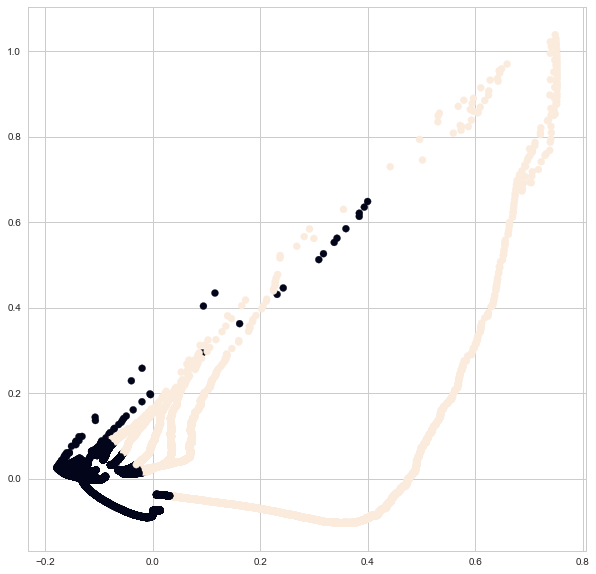

In [30]:
plt.scatter(boston_pca[:, 0], boston_pca[:, 1], c=y_pred)
plt.show()

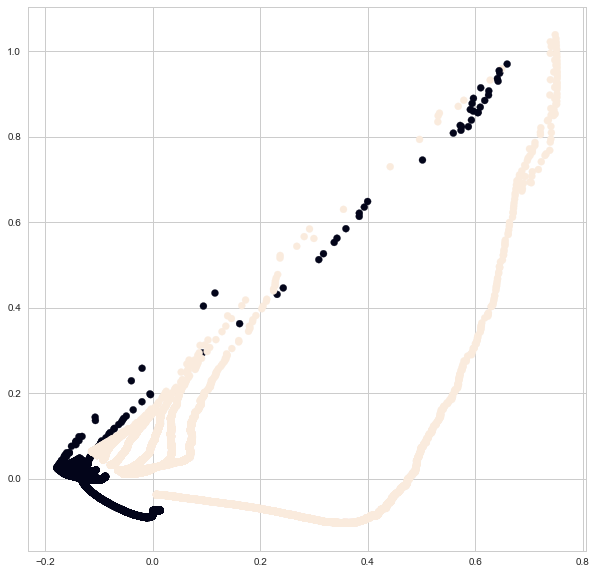

In [31]:
plt.scatter(boston_pca[:, 0], boston_pca[:, 1], c=boston_norm2['sex'])
plt.show()

In [32]:
tab = pd.crosstab(y_pred, boston_norm2['sex'])
tab

sex,0,1
row_0,,
0,14344,7412
1,23,10205


Our clustering solution is 76.8 % accurate in determining gender:

In [33]:
x = (tab.iloc[0][0] + tab.iloc[1][1]) / tab.sum().sum()
x

0.76754002001000499

### Re-do Using Folds and PCA

In [37]:
def kmeans_pca_eval(df, no_of_folds, output_col):
    # Make copy of original table and work on that- this leaves 
    # the original dataframe unaltered so that the function
    # can be run multiple times without giving an error msg
    df_for_use = df.copy()
    pca = PCA(n_components=2)
    # Create dictionary to hold the divided data    
    samples_dict = {}
    plt.rcParams['figure.figsize'] = (14.0, 4.0)
    for i in range(0, no_of_folds):
        sample_portion = df_for_use.sample(frac=1/no_of_folds)
        
        # Add the chosen rows to the dictionary
        # First element under each key is the 2-D PCA transform of the data:
        sample_pca = pca.fit_transform(sample_portion.drop([output_col, 'genderdiv'], axis=1))
        samples_dict[i] = [sample_pca]
        # Second element is the output column, i.e. what we are trying to model:
        actual = sample_portion[output_col]
        samples_dict[i].append(list(actual))
        
        cluster_pred = KMeans(n_clusters=2, random_state=42).fit(sample_pca)
        # Third element are the predicted values:
        predicted = cluster_pred.labels_
        samples_dict[i].append(predicted)
        # Remove the chosen rows from consideration for future samples
        df_for_use.drop(sample_portion.index, inplace=True)
        plt.subplot(i+1, 2, 1)
        plt.scatter(samples_dict[i][0][:,0], samples_dict[i][0][:,1], c=samples_dict[i][2])
        plt.rcParams['figure.figsize'] = (10, 10)
        plt.ylim(-0.5, 1.5)
        plt.title('Sample' + str(i + 1) + ': Predicted values')
        
        plt.subplot(i+1, 2, 2)
        plt.scatter(samples_dict[i][0][:,0], samples_dict[i][0][:,1], c=samples_dict[i][1])
        plt.ylim(-0.5, 1.5)
        plt.title('Sample' + str(i + 1) + ': Actual values')
        plt.show()
        tab = pd.crosstab(predicted, actual)
        print(tab)
        print('Percentage Agreement: {}'.format((tab[0][0] + tab[1][1]) / tab.sum().sum()))     

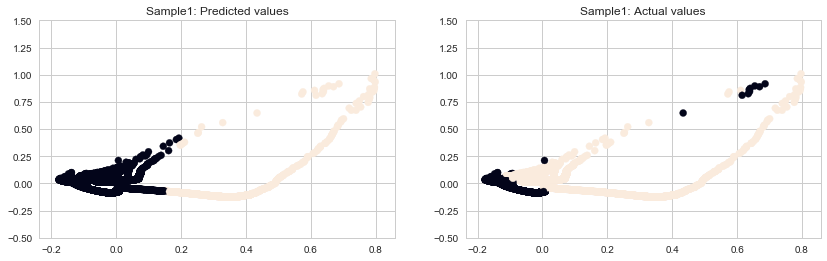

sex       0     1
row_0            
0      3542  3571
1         9   874
Percentage Agreement: 0.5522761380690345


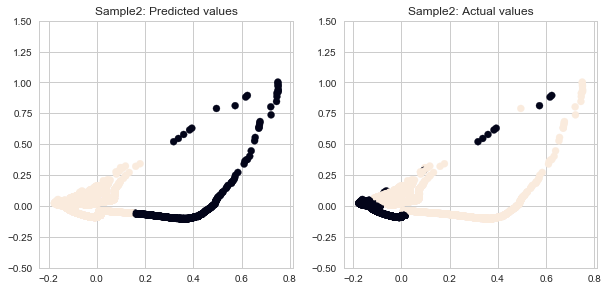

sex       0     1
row_0            
0         8   630
1      2716  2643
Percentage Agreement: 0.44205436051359015


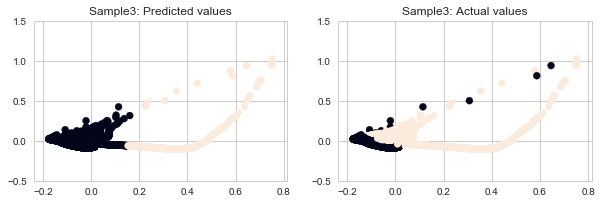

sex       0     1
row_0            
0      2040  1989
1         3   466
Percentage Agreement: 0.5571365051133838


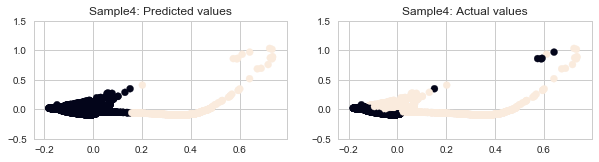

sex       0     1
row_0            
0      1461  1537
1         4   371
Percentage Agreement: 0.5431366735843463


In [39]:
kmeans_pca_eval(boston_norm2, 4, 'sex')

### Re-do Using Folds, no PCA, no Graphical Representation

In [94]:
def kmeans_cont_ari_eval(df, no_of_folds, output_col):
    # Make copy of original table and work on that- this leaves 
    # the original dataframe unaltered so that the function
    # can be run multiple times without giving an error msg
    global tab
    df_for_use = df.copy()
    # Create dictionary to hold the divided data    
    samples_dict = {}
 
    for i in range(0, no_of_folds):
        sample_portion = df_for_use.sample(frac=1/no_of_folds)
        
        # Add the chosen rows to the dictionary
        # First element under each key is the 2-D PCA transform of the data:
       
        samples_dict[i] = [sample_portion]
        # Second element is the output column, i.e. what we are trying to model:
        actual = sample_portion[output_col]
        samples_dict[i].append(list(actual))
        
        cluster_pred = KMeans(n_clusters=2, random_state=42).fit(sample_portion.drop([output_col, 'genderdiv'], axis=1))
        # Third element are the predicted values:
        predicted = cluster_pred.labels_
        samples_dict[i].append(predicted)
        # Remove the chosen rows from consideration for future samples
        df_for_use.drop(sample_portion.index, inplace=True)
        
        rand_adj = metrics.adjusted_rand_score(predicted, actual)
        
        tab = pd.crosstab(predicted, actual)
        tab.columns.name = 'actual'
        tab.index.name = 'pred'
        print('\n Sample ' + str(i+1) + ':')
        print(tab)
        agree = (tab[0][0] + tab[1][1]) / tab.sum().sum()
        print('Percentage Agreement: ' + '%.4f' % agree) 
        print('Adjusted Rand Index: ' + '%.4f' % rand_adj)
        print('_' * 50)

In [95]:
kmeans_cont_ari_eval(boston_norm2, 4, 'sex')


 Sample 1:
actual     0     1
pred              
0         14   792
1       3645  3545
Percentage Agreement: 0.4451
Adjusted Rand Index: 0.0075
__________________________________________________

 Sample 2:
actual     0     1
pred              
0       2726  2607
1          2   662
Percentage Agreement: 0.5649
Adjusted Rand Index: 0.0119
__________________________________________________

 Sample 3:
actual     0     1
pred              
0       1953  2027
1          5   513
Percentage Agreement: 0.5482
Adjusted Rand Index: -0.0007
__________________________________________________

 Sample 4:
actual     0     1
pred              
0       1481  1520
1          4   368
Percentage Agreement: 0.5482
Adjusted Rand Index: 0.0005
__________________________________________________


In [111]:
def meanshift_cont_ari_eval(df, no_of_folds, quantile, output_col):
    # Make copy of original table and work on that- this leaves 
    # the original dataframe unaltered so that the function
    # can be run multiple times without giving an error msg
    global tab
    df_for_use = df.copy()
    # Create dictionary to hold the divided data    
    samples_dict = {}
 
    for i in range(0, no_of_folds):
        sample_portion = df_for_use.sample(frac=1/no_of_folds)
        
        # Add the chosen rows to the dictionary
        # First element under each key is the 2-D PCA transform of the data:       
        samples_dict[i] = [sample_portion]
              
        # Second element is the output column, i.e. what we are trying to model:
        actual = sample_portion[output_col]
        samples_dict[i].append(list(actual))       
        bandwidth = estimate_bandwidth(sample_portion.drop([output_col, 'genderdiv'], axis=1), quantile=quantile, n_samples=500)       
        # Declare and fit the model
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        ms.fit(sample_portion.drop([output_col, 'genderdiv'], axis=1))        
        # The 'labels' are the clusters to which each datapoint belongs
        predicted = ms.labels_ 
        # The locations of the cluster centers
        cluster_centers = ms.cluster_centers_ 
               
        # Third element: the predicted values        
        samples_dict[i].append(predicted)
        # Remove the chosen rows from consideration for future samples
        df_for_use.drop(sample_portion.index, inplace=True)   

        # Note that the following comparisons only work if you have two clusters, because
        # the output column ('sex') is binary. Thus we add a conditional:        
        if len(cluster_centers) == 2:
            rand_adj = metrics.adjusted_rand_score(predicted, actual)
                
            tab = pd.crosstab(predicted, actual)
            tab.columns.name = 'actual'
            tab.index.name = 'pred'
            print('\n Sample ' + str(i+1) + ':')
            print(tab)
            agree = (tab[0][0] + tab[1][1]) / tab.sum().sum()
            print('Percentage Agreement: ' + '%.4f' % agree) 
            print('Adjusted Rand Index: ' + '%.4f' % rand_adj)
            print('_' * 50)
        else:
            print('Cannot compute non-binary solution')
            print('_' * 50)

In [112]:
meanshift_cont_ari_eval(boston_norm2, 4, 0.95, 'sex')


 Sample 1:
actual     0     1
pred              
0       3611  4320
1          6    59
Percentage Agreement: 0.4590
Adjusted Rand Index: -0.0021
__________________________________________________

 Sample 2:
actual     0     1
pred              
0       2742  3193
1         12    50
Percentage Agreement: 0.4656
Adjusted Rand Index: -0.0017
__________________________________________________

 Sample 3:
actual     0     1
pred              
0       2020  2448
1          3    27
Percentage Agreement: 0.4551
Adjusted Rand Index: -0.0018
__________________________________________________

 Sample 4:
actual     0     1
pred              
0       1464  1872
1          5    32
Percentage Agreement: 0.4435
Adjusted Rand Index: -0.0032
__________________________________________________


In [115]:
def spect_cont_ari_eval(df, no_of_folds, clusters, output_col):
    # Make copy of original table and work on that- this leaves 
    # the original dataframe unaltered so that the function
    # can be run multiple times without giving an error msg
    df_for_use = df.copy()
    # Create dictionary to hold the divided data    
    samples_dict = {}
 
    for i in range(0, no_of_folds):
        sample_portion = df_for_use.sample(frac=1/no_of_folds)
        
        # Add the chosen rows to the dictionary
        # First element under each key is the 2-D PCA transform of the data:       
        samples_dict[i] = [sample_portion]
        
        # Second element is the output column, i.e. what we are trying to model:
        actual = sample_portion[output_col]
        samples_dict[i].append(list(actual))     

        # Get no. of clusters from input value
        n_clusters=clusters       
        # Declare and fit the model. Predict the clusters and insert into the dataframe.
        # n_jobs=-1 means that for faster completion, the algo will run parallel processes 
        # on as many cores as the computer has:
        sc = SpectralClustering(n_clusters=clusters, n_jobs=-1)
        predicted = sc.fit_predict(sample_portion.drop([output_col, 'genderdiv'], axis=1))   
        # Third element: the predicted values
        samples_dict[i].append(predicted)
        rand_adj = metrics.adjusted_rand_score(predicted, actual)
            
        tab = pd.crosstab(predicted, actual)
        tab.columns.name = 'actual'
        tab.index.name = 'pred'
        print('\n Sample ' + str(i+1) + ':')
        print(tab)
        agree = (tab[0][0] + tab[1][1]) / tab.sum().sum()
        print('Percentage Agreement: ' + '%.4f' % agree) 
        print('Adjusted Rand Index: ' + '%.4f' % rand_adj)
        print('_' * 50)

In [116]:
spect_cont_ari_eval(boston_norm2, 4, 2, 'sex')


 Sample 1:
actual     0     1
pred              
0       3596  3546
1          5   849
Percentage Agreement: 0.5559
Adjusted Rand Index: 0.0064
__________________________________________________

 Sample 2:
actual     0     1
pred              
0       3607  3459
1          8   922
Percentage Agreement: 0.5664
Adjusted Rand Index: 0.0123
__________________________________________________

 Sample 3:
actual     0     1
pred              
0          7   941
1       3556  3492
Percentage Agreement: 0.4376
Adjusted Rand Index: 0.0087
__________________________________________________

 Sample 4:
actual     0     1
pred              
0       3553  3546
1         12   885
Percentage Agreement: 0.5550
Adjusted Rand Index: 0.0050
__________________________________________________
